In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy.cosmology import FlatLambdaCDM
from scipy.stats import chisquare
from scipy.stats import linregress

Chi-square statistic: 1.3642420526595093e-11
P-value: 1.0


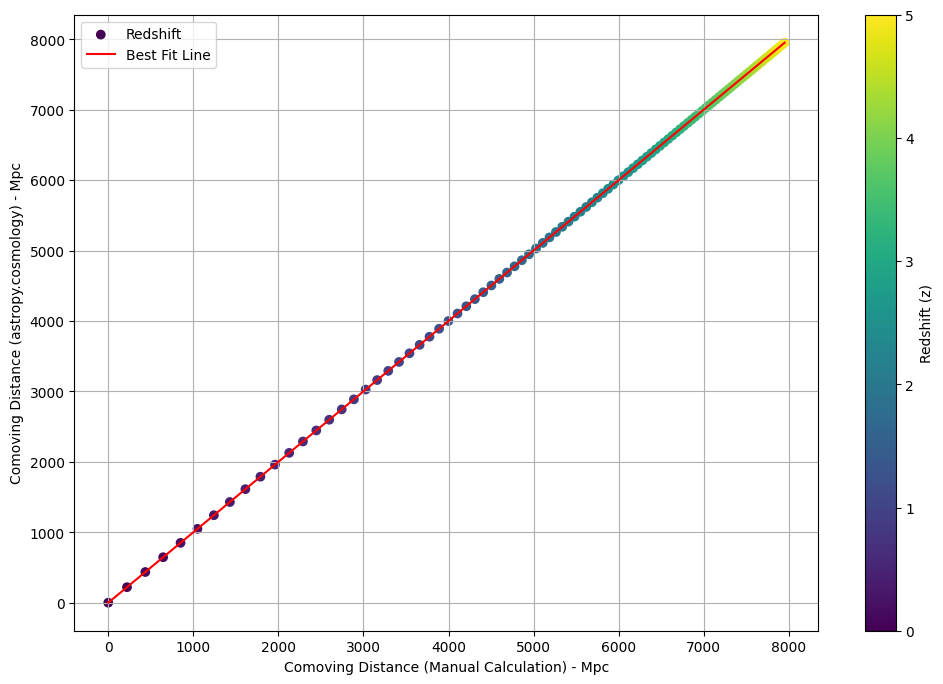

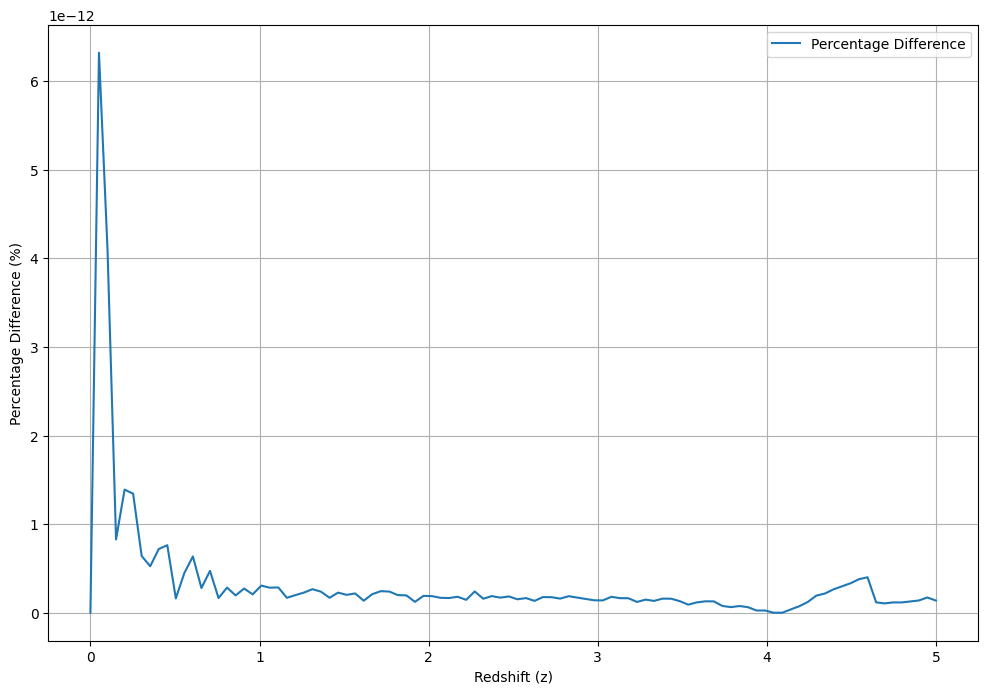

In [ ]:
# Line-of-sight Comoving Distance (D_c(z))

# Constants
c = 299792.458  # Speed of light in km/s

# Manual comoving distance function
def comoving_distance(z):
    integrand = lambda x: 1 / np.sqrt(Omega_m0 * (1 + x)**3 + Omega_k0 * (1 + x)**2 + Omega_lambda)
    result, _ = quad(integrand, 0, z, epsrel=1e-8)  # Use epsrel for better integration accuracy
    return (c / H0) * result

# FlatLambdaCDM cosmology model
H0_astropy = 67.8       # Hubble constant in km/s/Mpc
Om0_astropy = 0.3089    # Matter density parameter at present
cosmo_astropy = FlatLambdaCDM(H0_astropy, Om0_astropy)

# Redshift values
redshifts = np.linspace(0, 5, 100)

# Calculate comoving distance for each redshift using the manual calculation
comoving_distances_manual = np.array([comoving_distance(z) for z in redshifts])

# Calculate comoving distance for each redshift using astropy.cosmology
comoving_distances_astropy = np.array([cosmo_astropy.comoving_distance(z).value for z in redshifts])

# Perform linear regression to get the best-fit line
slope, intercept, _, _, _ = linregress(comoving_distances_manual, comoving_distances_astropy)
best_fit_line = slope * comoving_distances_manual + intercept

# Calculate the percentage difference, adding a small constant to avoid division by zero
percentage_difference = 100 * np.abs(comoving_distances_astropy - comoving_distances_manual) / (comoving_distances_astropy + 1e-10)

# Perform a chi-squared test on the best-fit line
observed_values = comoving_distances_astropy
expected_values = best_fit_line
chi2_stat, p_value = chisquare(observed_values, f_exp=expected_values)

# Print the chi-square test results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot with best-fit line
plt.scatter(comoving_distances_manual, comoving_distances_astropy, c=redshifts, cmap='viridis', label='Redshift')
plt.plot(comoving_distances_manual, best_fit_line, color='red', label='Best Fit Line')

plt.title('')
plt.xlabel('Comoving Distance (Manual Calculation) - Mpc')
plt.ylabel('Comoving Distance (astropy.cosmology) - Mpc')
plt.colorbar(label='Redshift (z)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting percentage difference
plt.figure(figsize=(12, 8))
plt.plot(redshifts, percentage_difference, label='Percentage Difference')
plt.title('')
plt.xlabel('Redshift (z)')
plt.ylabel('Percentage Difference (%)')
plt.legend()
plt.grid(True)
plt.show()


Chi-square statistic: 7.730704965070913e-12
P-value: 1.0


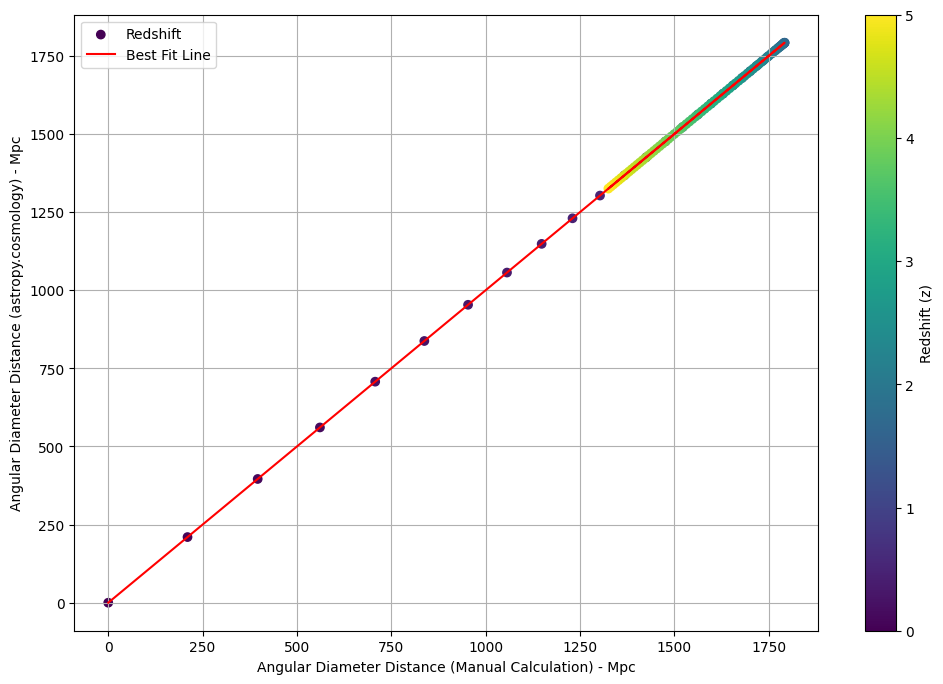

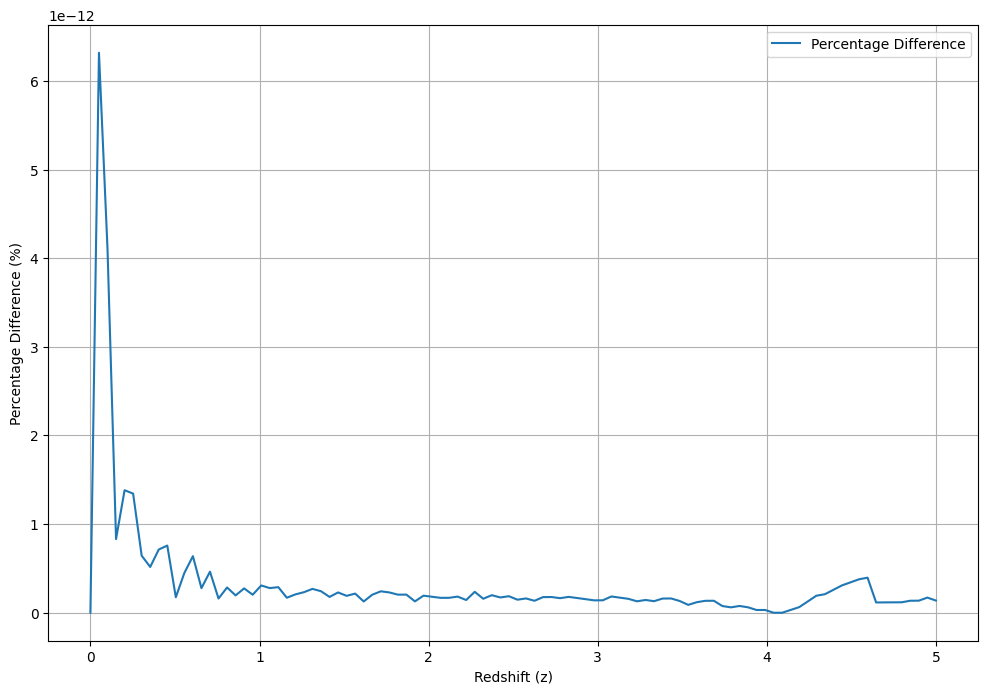

In [ ]:
# Angular Diameter Distance (D_A(z))

# Constants
c = 299792.458  # Speed of light in km/s

# Manual comoving distance function
def comoving_distance(z, H0, Omega_m0, Omega_k0, Omega_lambda):
    integrand = lambda x: 1 / np.sqrt(Omega_m0 * (1 + x)**3 + Omega_k0 * (1 + x)**2 + Omega_lambda)
    result, _ = quad(integrand, 0, z, epsrel=1e-8)
    return (c / H0) * result

# FlatLambdaCDM cosmology model
H0_astropy = 67.8       # Hubble constant in km/s/Mpc
Om0_astropy = 0.3089    # Matter density parameter at present
cosmo_astropy = FlatLambdaCDM(H0_astropy, Om0_astropy)

# Manual cosmological parameters
H0_manual = 67.8
Omega_m0_manual = 0.3089
Omega_k0_manual = 0.0
Omega_lambda_manual = 0.6911

# Redshift values
redshifts = np.linspace(0, 5, 100)

# Calculate comoving distance for each redshift using the manual calculation
comoving_distances_manual = np.array([comoving_distance(z, H0_manual, Omega_m0_manual, Omega_k0_manual, Omega_lambda_manual) for z in redshifts])

# Calculate angular diameter distance for each redshift using the formula D_A = D_C / (1 + z) for manual calculation
angular_diameter_distances_manual = comoving_distances_manual / (1 + redshifts)

# Calculate angular diameter distance for each redshift using astropy.cosmology
angular_diameter_distances_astropy = np.array([cosmo_astropy.angular_diameter_distance(z).value for z in redshifts])

# Perform linear regression to get the best-fit line
slope, intercept, _, _, _ = linregress(angular_diameter_distances_manual, angular_diameter_distances_astropy)
best_fit_line = slope * angular_diameter_distances_manual + intercept

# Calculate the percentage difference, adding a small constant to avoid division by zero
percentage_difference = 100 * np.abs(angular_diameter_distances_astropy - angular_diameter_distances_manual) / (angular_diameter_distances_astropy + 1e-10)

# Perform a chi-squared test on the best-fit line
observed_values = angular_diameter_distances_astropy
expected_values = best_fit_line
chi2_stat, p_value = chisquare(observed_values, f_exp=expected_values)

# Print the chi-square test results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot with best-fit line
plt.scatter(angular_diameter_distances_manual, angular_diameter_distances_astropy, c=redshifts, cmap='viridis', label='Redshift')
plt.plot(angular_diameter_distances_manual, best_fit_line, color='red', label='Best Fit Line')

plt.title('')
plt.xlabel('Angular Diameter Distance (Manual Calculation) - Mpc')
plt.ylabel('Angular Diameter Distance (astropy.cosmology) - Mpc')
plt.colorbar(label='Redshift (z)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting percentage difference
plt.figure(figsize=(12, 8))
plt.plot(redshifts, percentage_difference, label='Percentage Difference')
plt.title('')
plt.xlabel('Redshift (z)')
plt.ylabel('Percentage Difference (%)')
plt.legend()
plt.grid(True)
plt.show()

Chi-square statistic: 2.1827872842557234e-11
P-value: 1.0


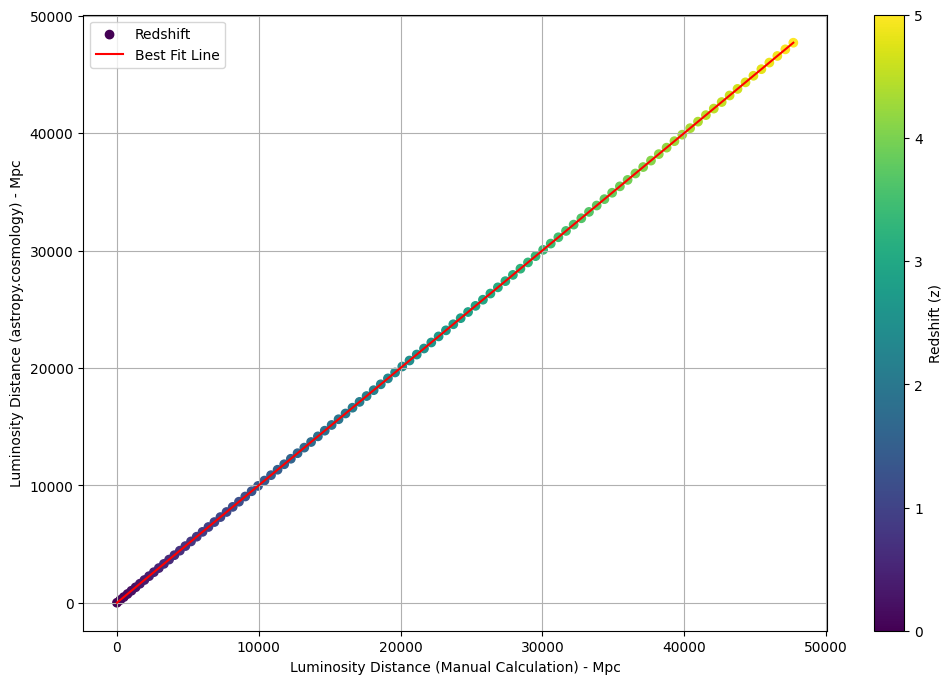

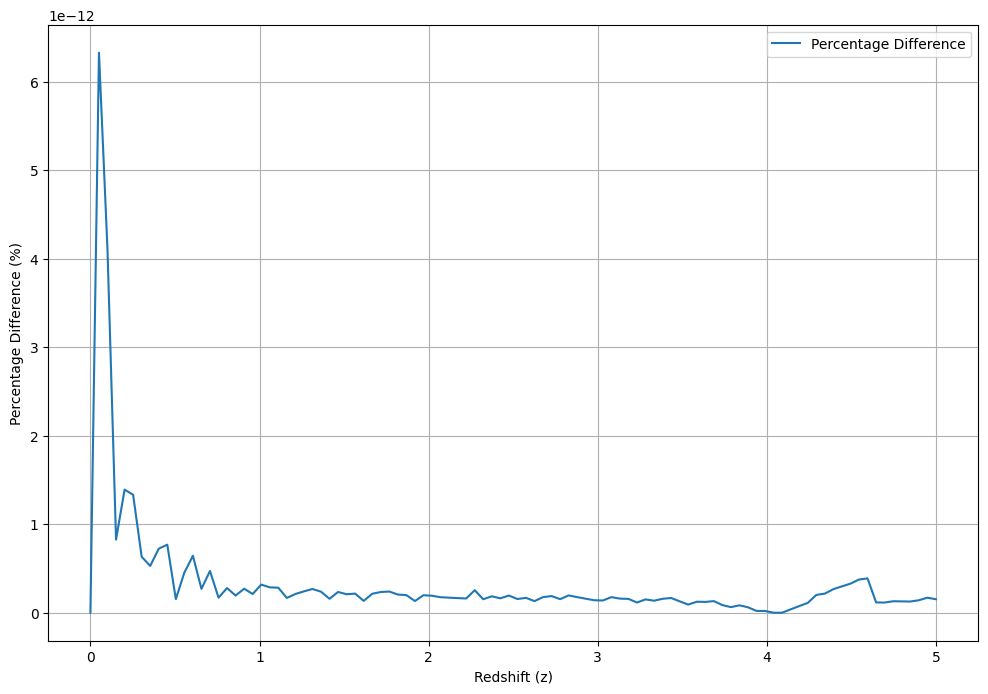

In [ ]:
# Luminosity Distance (D_L(z))

# Constants
c = 299792.458  # Speed of light in km/s

# Manual comoving distance function
def comoving_distance(z):
    integrand = lambda x: 1 / np.sqrt(Omega_m0 * (1 + x)**3 + Omega_k0 * (1 + x)**2 + Omega_lambda)
    result, _ = quad(integrand, 0, z, epsrel=1e-8)
    return (c / H0) * result

# Manual luminosity distance function
def luminosity_distance(z):
    comoving_dist = comoving_distance(z)
    return (1 + z) * comoving_dist

# FlatLambdaCDM cosmology model
H0_astropy = 67.8       # Hubble constant in km/s/Mpc
Om0_astropy = 0.3089    # Matter density parameter at present
cosmo_astropy = FlatLambdaCDM(H0_astropy, Om0_astropy)

# Manual cosmological parameters
H0 = 67.8
Omega_m0 = 0.3089
Omega_k0 = 0.0
Omega_lambda = 0.6911

# Redshift values
redshifts = np.linspace(0, 5, 100)

# Calculate comoving distance for each redshift using the manual calculation
comoving_distances_manual = np.array([comoving_distance(z) for z in redshifts])

# Calculate luminosity distance for each redshift using the manual calculation
luminosity_distances_manual = np.array([luminosity_distance(z) for z in redshifts])

# Calculate luminosity distance for each redshift using astropy.cosmology
luminosity_distances_astropy = np.array([cosmo_astropy.luminosity_distance(z).value for z in redshifts])

# Perform linear regression to get best-fit line
slope, intercept, _, _, _ = linregress(luminosity_distances_manual, luminosity_distances_astropy)
best_fit_line = slope * luminosity_distances_manual + intercept

# Calculate percentage difference, adding a small constant to avoid division by zero
percentage_difference = 100 * np.abs(luminosity_distances_manual - luminosity_distances_astropy) / (luminosity_distances_manual + 1e-10)

# Perform a chi-squared test on best-fit line
observed_values = luminosity_distances_manual
expected_values = best_fit_line
chi2_stat, p_value = chisquare(observed_values, f_exp=expected_values)

# Print the chi-square test results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot with best-fit line
plt.scatter(luminosity_distances_manual, luminosity_distances_astropy, c=redshifts, cmap='viridis', label='Redshift')
plt.plot(luminosity_distances_manual, best_fit_line, color='red', label='Best Fit Line')

plt.title('')
plt.xlabel('Luminosity Distance (Manual Calculation) - Mpc')
plt.ylabel('Luminosity Distance (astropy.cosmology) - Mpc')
plt.colorbar(label='Redshift (z)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting percentage difference
plt.figure(figsize=(12, 8))
plt.plot(redshifts, percentage_difference, label='Percentage Difference')
plt.title('')
plt.xlabel('Redshift (z)')
plt.ylabel('Percentage Difference (%)')
plt.legend()
plt.grid(True)
plt.show()

Chi-square statistic: 0.006682498492787454
P-value: 1.0


C:\Users\misha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\astropy\cosmology\flrw\base.py:1341: RuntimeWarning: divide by zero encountered in log10
  val = 5.0 * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


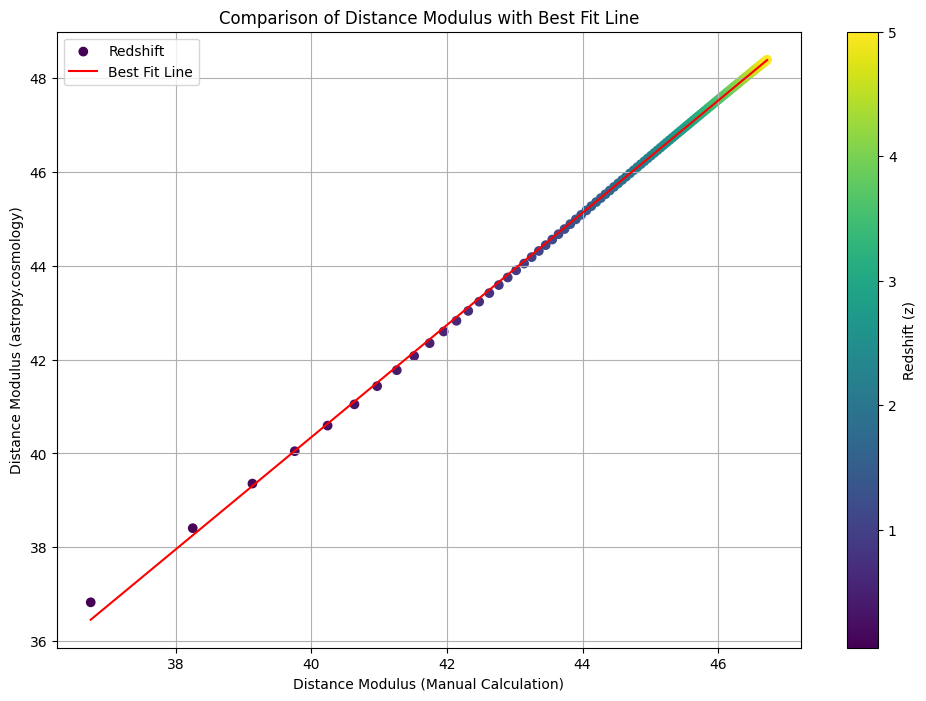

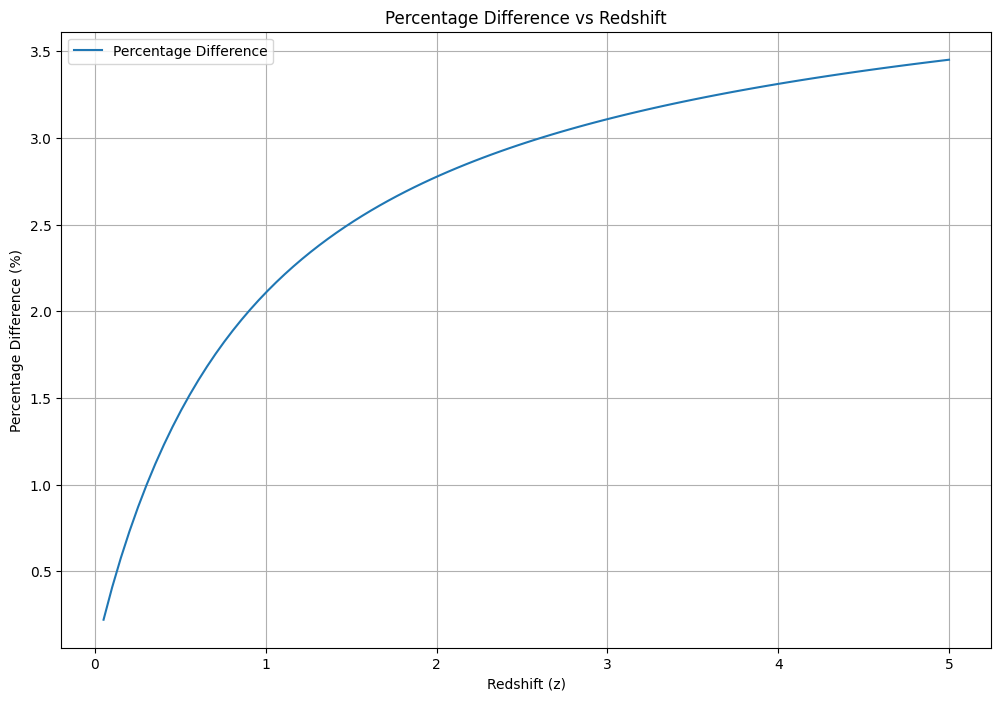

In [ ]:
# Distance Modulus (μ)

# Constants
c = 299792.458  # Speed of light in km/s

# Manual comoving distance function
def comoving_distance(z, H0, Omega_m0, Omega_k0, Omega_lambda):
    integrand = lambda x: 1 / np.sqrt(Omega_m0 * (1 + x)**3 + Omega_k0 * (1 + x)**2 + Omega_lambda)
    result, _ = quad(integrand, 0, z, epsrel=1e-8)
    return (c / H0) * result

# Manual distance modulus function
def distance_modulus_manual(z, H0, Omega_m0, Omega_k0, Omega_lambda):
    cz_over_H0 = (c * z) / H0
    if cz_over_H0 <= 0:
        return np.nan
    else:
        return 25 + 5 * np.log10(cz_over_H0)

# FlatLambdaCDM cosmology model
H0_astropy = 67.8       # Hubble constant in km/s/Mpc
Om0_astropy = 0.3089    # Matter density parameter at present
cosmo_astropy = FlatLambdaCDM(H0_astropy, Om0_astropy)

# Manual cosmological parameters
H0_manual = 67.8
Omega_m0_manual = 0.3089
Omega_k0_manual = 0.0
Omega_lambda_manual = 0.6911

# Redshift values
redshifts = np.linspace(0, 5, 100)

# Calculate distance modulus for each redshift using the manual calculation
distance_modulus_manual_values = np.array([distance_modulus_manual(z, H0_manual, Omega_m0_manual, Omega_k0_manual, Omega_lambda_manual) for z in redshifts])

# Calculate distance modulus for each redshift using astropy.cosmology
distance_modulus_astropy_values = np.array([cosmo_astropy.distmod(z).value for z in redshifts])

# Filter out NaN values
valid_data_mask = ~np.isnan(distance_modulus_manual_values) & ~np.isnan(distance_modulus_astropy_values)
valid_manual_values = distance_modulus_manual_values[valid_data_mask]
valid_astropy_values = distance_modulus_astropy_values[valid_data_mask]

# Perform linear regression to get the best-fit line
slope, intercept, _, _, _ = linregress(valid_manual_values, valid_astropy_values)
best_fit_line = slope * valid_manual_values + intercept

# Calculate the percentage difference, adding a small constant to avoid division by zero
percentage_difference = 100 * np.abs(valid_astropy_values - valid_manual_values) / (valid_astropy_values + 1e-10)

# Perform a chi-squared test on residuals
observed_values = valid_astropy_values
expected_values = best_fit_line
chi2_stat, p_value = chisquare(observed_values, f_exp=expected_values)

# Print the chi-square test results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot with best-fit line
plt.scatter(valid_manual_values, valid_astropy_values, c=redshifts[valid_data_mask], cmap='viridis', label='Redshift')
plt.plot(valid_manual_values, best_fit_line, color='red', label='Best Fit Line')

plt.title('')
plt.xlabel('Distance Modulus (Manual Calculation)')
plt.ylabel('Distance Modulus (astropy.cosmology)')
plt.colorbar(label='Redshift (z)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting percentage difference
plt.figure(figsize=(12, 8))
plt.plot(redshifts[valid_data_mask], percentage_difference, label='Percentage Difference')
plt.title('')
plt.xlabel('Redshift (z)')
plt.ylabel('Percentage Difference (%)')
plt.legend()
plt.grid(True)
plt.show()